In [2]:
import pandas as pd
import pathpy as pp
import pathpy.algorithms.statistics as stat
import pathpy.algorithms.shortest_paths as shorty
import numpy as np
import math as m
import matplotlib.pyplot as plt


In [3]:
df = pd.read_excel (r'manufacturing_emails_temporal_network.xlsx')

In [4]:
nodes = pd.concat([df["node1"], df["node2"]]).unique()
N = len(nodes)
print (len(nodes))

links = df[["node1","node2"]]
links = links.drop_duplicates()
L = links.shape[0]

167


In [5]:
temporal = pp.TemporalNetwork()
for ind in df.index:
    temporal.add_edge(df['node1'][ind], df['node2'][ind], int(df['timestamp'][ind]))
print(temporal)

Nodes:			167
Time-stamped links:	82876
Links/Nodes:		496.2634730538922
Observation period:	[1, 57791]
Observation length:	 57790 
Time stamps:		 57791 
Avg. inter-event dt:	 1.0
Min/Max inter-event dt:	 1/1


In [6]:
# edges = temporal.filter_edges(lambda v, w, time: time == 1)

edges = df[df['timestamp'] == 2]


print(edges.head(20))

    node1  node2  timestamp
16     18     19          2


In [8]:
def infect_graph(seed):
    end = 57792
    infected = {seed}
    stop_t = 0
    for t in range(1, end):
        edges = df[df['timestamp'] == t].to_numpy()
        new_infections = set()
        for e in edges:
            if(e[0] in infected):
                new_infections.add(e[1])
            elif(e[1] in infected):
                new_infections.add(e[0])
        infected.update(new_infections)

        if(len(infected)/N*100 > 50):
#             print(seed)
#             print(new_infections)
#             print(f"Stopped at {t}")
            return t

ts = {}
its = 0
for i in nodes:
    its = its + 1
    print(its)
    ts[i] = infect_graph(i)




1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167


[  257   262   262   262   262   262   270   285   293   293   329   329
   329   329   329   330   330   330   338   338   345   345   345   345
   345   345   345   345   345   345   345   345   345   345   345   345
   345   345   345   362   363   363   363   363   363   365   365   365
   370   378   378   378   380   380   410   410   410   410   414   414
   414   414   414   421   421   449   449   449   460   460   460   460
   460   461   461   461   486   505   505   505   505   507   507   507
   507   507   509   526   552   596   597   673   680   684   692   716
   718   718   718   758   762   799   801   838   852   852   852   852
   852   852   852  1045  1092  1100  1387  1408  1437  1460  1561  1565
  1835  1850  1852  1855  1855  1855  1855  1855  1855  1855  1855  1855
  1855  1855  1855  1855  1987  1990  2164  2174  2174  2174  2240  2240
  2240  2272  2547  2569  4359  5476  6477 14719 15757 25205 25232 25232
 25232 27544 27558 27620 27855 28164 30750 31038 31

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.54297260e-03, 6.49033261e-04, 2.96896419e-03, 1.87328976e-03,
        9.37421259e-04, 3.08594519e-04, 1.78484147e-04, 6.14268454e-05,
        1.80869357e-04, 0.00000000e+00, 7.71486298e-06, 0.00000000e+00,
        2.04756151e-06, 2.58384795e-06, 3.26059568e-06, 5.14324198e-07]),
 array([  201.        ,   201.58489319,   202.51188643,   203.98107171,
          206.30957344,   210.        ,   215.84893192,   225.11886432,
          239.81071706,   263.09573445,   300.        ,   358.48931925,
          451.18864315,   598.10717055,   830.95734448,  1200.        ,
         1784.89319246,  2711.88643151,  4181.07170553,  6509.5734448 ,
        10200.        , 16048.93192461, 25318.8643151 , 40010.71705535,
        63295.73444802]),
 <BarContainer object of 24 artists>)

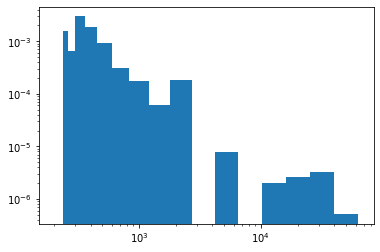

In [17]:
sts = np.sort(list(ts.values()))
print(sts)

bins = [ 200 + 10**x for x in np.arange(0,5, 0.2)]
print( bins)
plt.xscale('log')
plt.hist(sts, bins = bins, density=True, log=True)
